# 0.) Import and Clean data

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [32]:
#drive.mount('/content/gdrive/', force_remount = True)
df = pd.read_csv("Country-data.csv", sep = ",")

In [33]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [34]:
names = df[['country']].copy()
X = df.drop('country', axis = 1)

In [35]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [36]:
kmeans = KMeans(n_clusters = 5).fit(X_scaled)

C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# 2.) Pick two features to visualize across

In [37]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

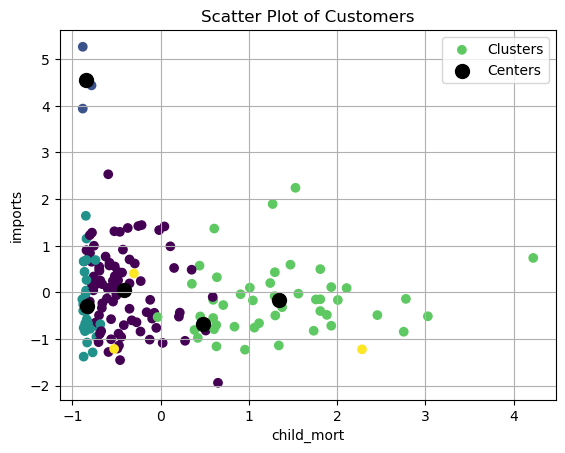

In [38]:
import matplotlib.pyplot as plt

x1_index = 0
x2_index = 3


scatter = plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis', label='Clusters')


centers = plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100, label='Centers')

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')

# Generate legend
plt.legend()

plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [39]:
WCSSs = []
Ks = range(1,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    WCSSs.append(kmeans.inertia_)

C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

In [40]:
# OPTIONAL ONE LINE
WCSSs = [KMeans(n_clusters = k, n_init = 30).fit(X_scaled).inertia_ for k in range(1,15)]

C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

Text(0, 0.5, 'WCSSs')

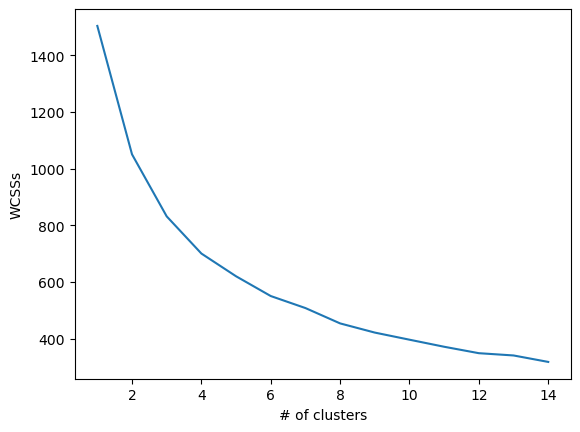

In [41]:
plt.plot(Ks, WCSSs)
plt.xlabel('# of clusters')
plt.ylabel('WCSSs')

#### I will choose 2 clusters to fit the model because the economy condition can be classified as developing and developed. In addition, as we increase the number of clusters, the WCSS did not decrease too much.

# 6.) Do the same for a silhoutte plot

In [42]:
from sklearn.metrics import silhouette_score

In [43]:
SSs = []
Ks = range(2,15)
for k in Ks:
    kmeans = KMeans(n_clusters = k, n_init = 30).fit(X_scaled)
    sil = silhouette_score(X_scaled, kmeans.labels_)
    SSs.append(sil)

C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0, 0.5, 'SSs')

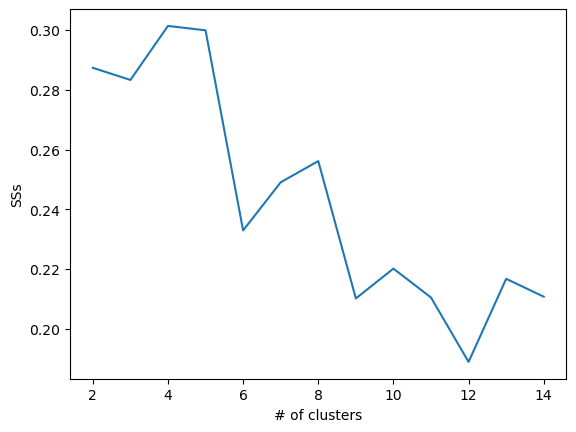

In [44]:
plt.plot(Ks, SSs)
plt.xlabel('# of clusters')
plt.ylabel('SSs')

# 7.) Create a list of the countries that are in each cluster. Write interesting things you notice.

In [45]:
kmeans = KMeans(n_clusters = 2, n_init = 30).fit(X_scaled)

C:\Users\Bill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [46]:
pred = pd.DataFrame(kmeans.labels_)

In [47]:
output = pd.concat([pred, df], axis = 1)

In [48]:
country_0 = list(output.loc[output[0] == 0, 'country'])

In [49]:
print(f'Cluster 1 : {country_0}')

Cluster 1 : ['Afghanistan', 'Angola', 'Bangladesh', 'Benin', 'Bolivia', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'India', 'Indonesia', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mongolia', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakistan', 'Philippines', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Turkmenistan', 'Uganda', 'Uzbekistan', 'Vanuatu', 'Yemen', 'Zambia']


In [50]:
country_1 = list(output.loc[output[0] == 1, 'country'])
print(f'Cluster 2 : {country_1}')

Cluster 2 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea

#### It is interesting that some coumtries are not developed, but are classified as the developed economy.
#### Classification of developing economy works better comparing with developed economy, 

# 8.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [51]:
numeric_columns = output.select_dtypes(include=[np.number])
grouped_means = numeric_columns.groupby(output[0]).mean()
grouped_means

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,,
0,0.0,76.280882,30.198515,6.090147,43.642146,4227.397059,11.098750,61.910294,4.413824,1981.235294
1,1.0,12.161616,48.603030,7.314040,49.121212,26017.171717,5.503545,76.493939,1.941111,20507.979798


In [52]:
numeric_columns = output.select_dtypes(include=[np.number])
grouped_std = numeric_columns.groupby(output[0]).std()
grouped_std

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,,,,,,,,,,
0,0.0,38.076068,18.201742,2.645319,19.323451,4890.581414,13.682630,6.897418,1.285590,2528.509189
1,0.0,8.523122,30.116032,2.716652,26.928785,20441.749847,6.957187,3.735757,0.486744,20578.727127


# 9.) Write an observation about the descriptive statistics.

#### Those who are classified as developed economy tends to have higher exports, income, life_expectancy, and gdp. They have lower child mortality and lower inflation.

#### Developed economy have higher standard deviation than developing economy, especially for gdp.